In [1]:
import warnings

import matplotlib.pyplot as plt

import os.path as osp

from lightning.pytorch import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from src.datasets import DatasetBuilder
from src.models import BetaVAE, Annealer
from src.models.lightning_wrappers import VAELightningWrapper  
from src.utils.generic_utils import seed_everything, get_config, load_model_weights, evaluate_classification_model

/data/leuven/365/vsc36567/miniconda3/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-05-13 01:03:35.258234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747091015.276151 3684695 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747091015.281576 3684695 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747091015.296277 3684695 computation_placer.cc:177] computation placer alrea

## Load a configuration file

In [9]:
config_path = r"/data/leuven/365/vsc36567/CF-Robustness-Benchmark/configs/train_vae_fmnist.yaml"
# r"D:\PycharmProjects\CF-Robustness-Benchmark\configs\train_vae_mnist.yaml"
config = get_config(config_path)

## Load the dataset

In [10]:
config.data.classes = [0, 2, 4, 6]
config.data.num_classes = len(config.data.classes)

In [11]:
ds_builder = DatasetBuilder(config)
ds_builder.setup()
train_loader, val_loader, test_loader = ds_builder.get_dataloaders()

In [12]:
class_names = ds_builder.class_encodings
class_names

{0: 0, 1: 2, 2: 4, 3: 6}

## Build the model

In [13]:
vae = BetaVAE(**config.model.args, input_size=(config.data.img_size, config.data.img_size))

In [14]:
lwrapper = VAELightningWrapper(config, vae)

In [15]:
expt_dir = r"/data/leuven/365/vsc36567/CF-Robustness-Benchmark/notebooks/experiments"
# r"D:\PycharmProjects\CF-Robustness-Benchmark\notebooks\experiments"
expt_name = f"{config.data.name}_vae"
expt_version = "binary"  if config.data.num_classes == 2 else "multiclass"
checkpints_dir = osp.join(expt_dir, expt_name, expt_version, 'checkpoints')
classes4fname = ("_").join([str(i) for i in class_names.values()]) if config.data.num_classes == 2 else ""


chekpoint_callback = ModelCheckpoint(
    monitor="train_total",
    dirpath=checkpints_dir,
    filename=f"{config.data.name}_{classes4fname}_{{epoch:02d}}",
    save_top_k=1,
    mode="min",
    save_weights_only=True,
)
chekpoint_callback.FILE_EXTENSION = '.pth'

tb_logger = TensorBoardLogger(save_dir=expt_dir, name=expt_name, version=expt_version)

trainer = Trainer(
    log_every_n_steps=10,
    max_epochs=config.epochs,
    enable_checkpointing=True,
    callbacks=[chekpoint_callback],
    logger=tb_logger
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/data/leuven/365/vsc36567/miniconda3/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /vsc-hard-mounts/leuven-data/365/vsc36567/CF-Robustness-Benchmark/notebooks/experiments/fmnist_vae/multiclass/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 419 K  | train
1 | loss  | BCELoss | 0      | train
------------------------------------------
419 K     Trainable params
0         Non-trainable params
419 K     Total params
1.679     Total estimated model params size (MB)
35        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

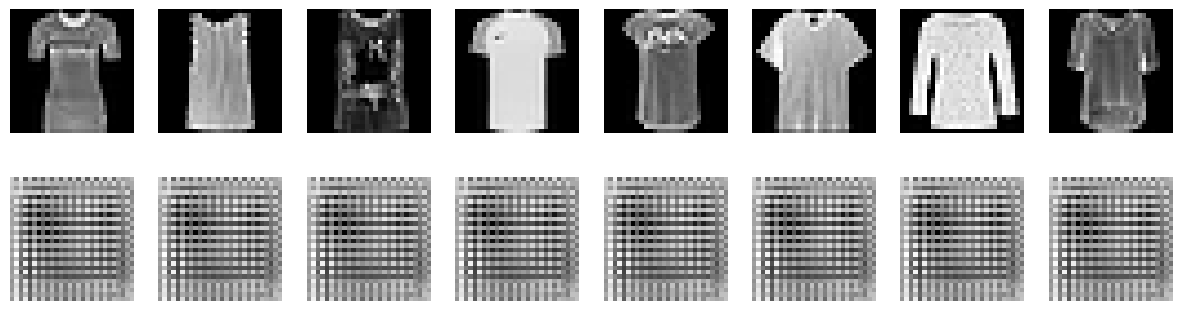

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

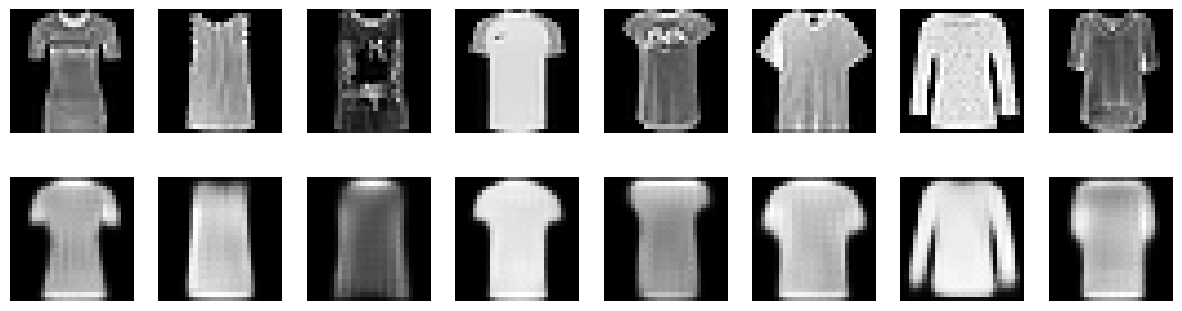

Validation: |          | 0/? [00:00<?, ?it/s]

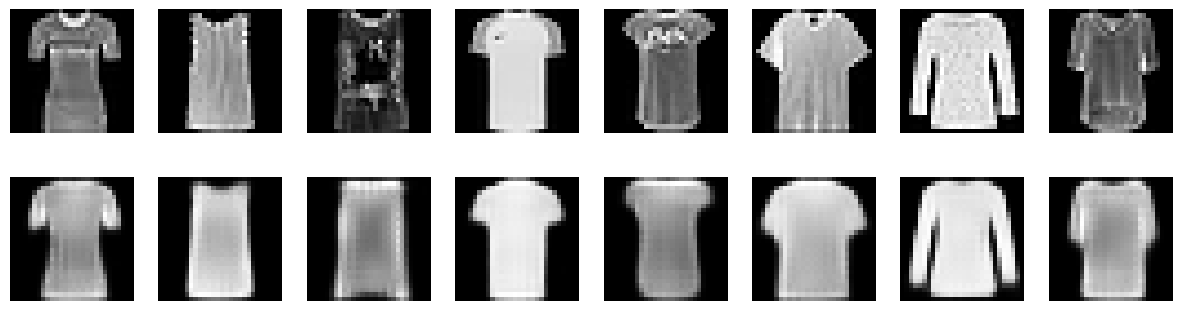

Validation: |          | 0/? [00:00<?, ?it/s]

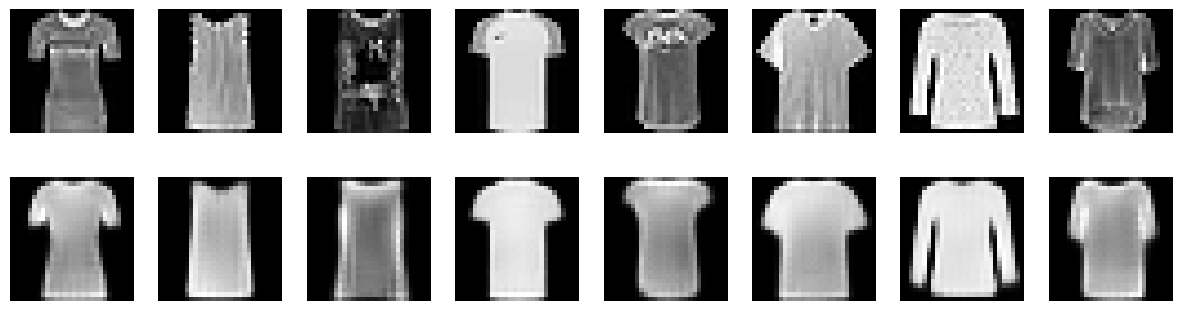

Validation: |          | 0/? [00:00<?, ?it/s]

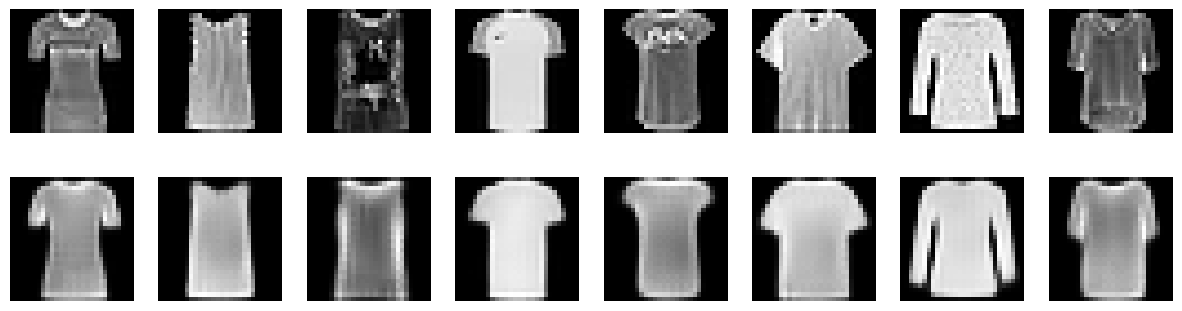

Validation: |          | 0/? [00:00<?, ?it/s]

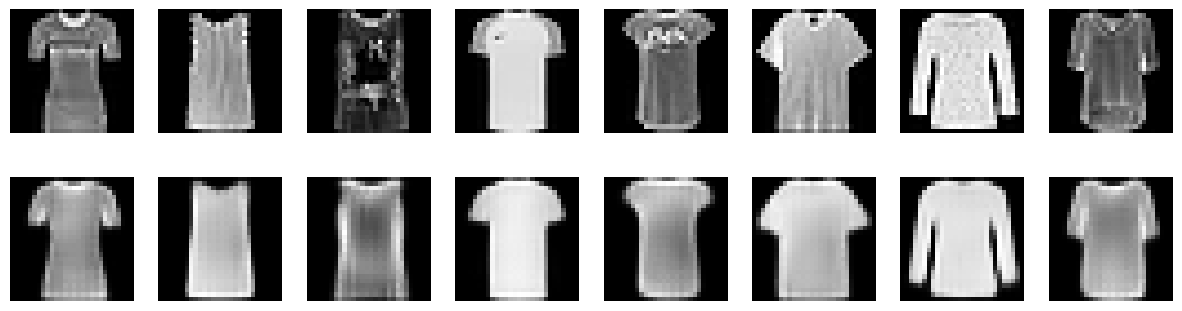

Validation: |          | 0/? [00:00<?, ?it/s]

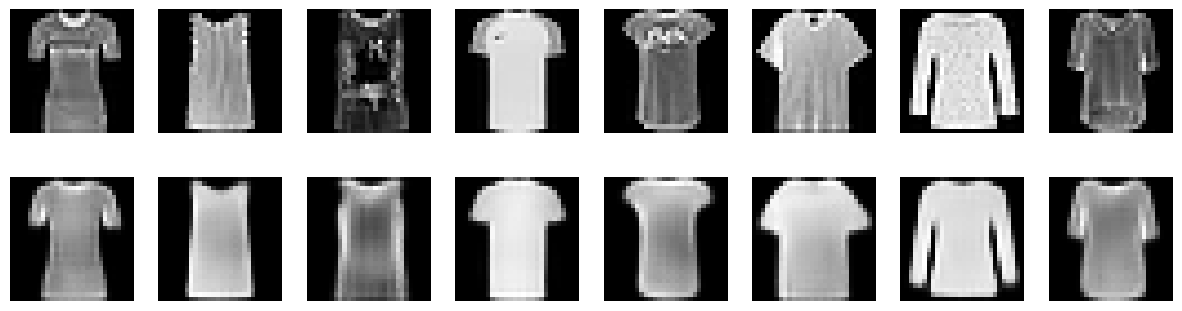

Validation: |          | 0/? [00:00<?, ?it/s]

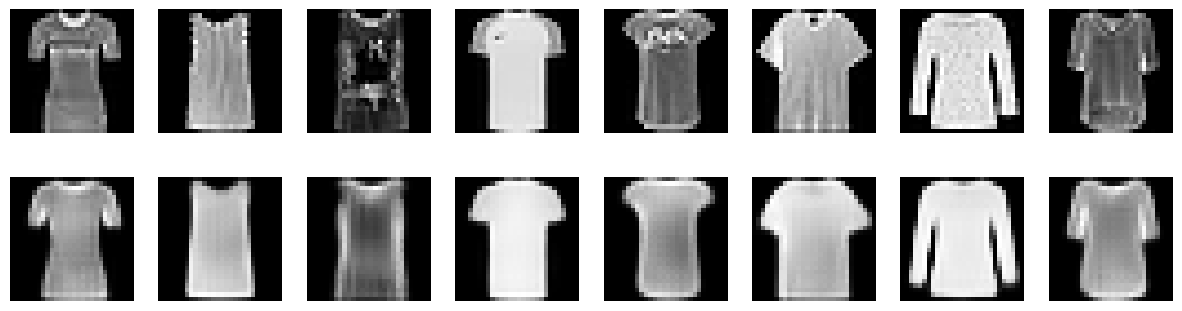

Validation: |          | 0/? [00:00<?, ?it/s]

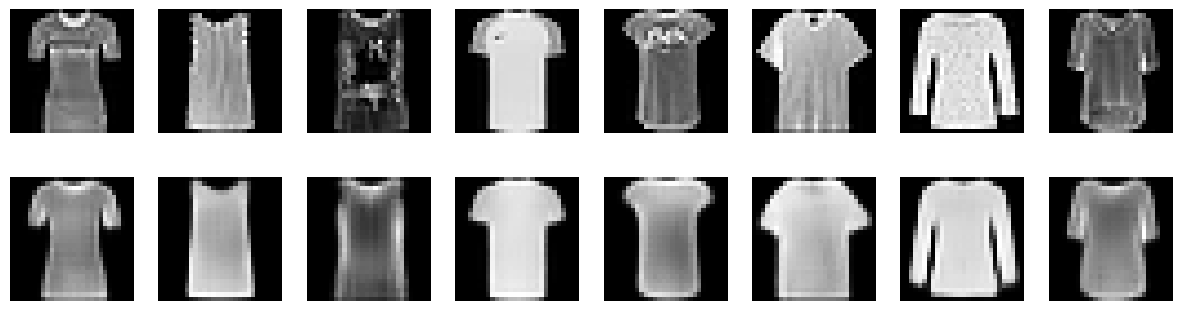

Validation: |          | 0/? [00:00<?, ?it/s]

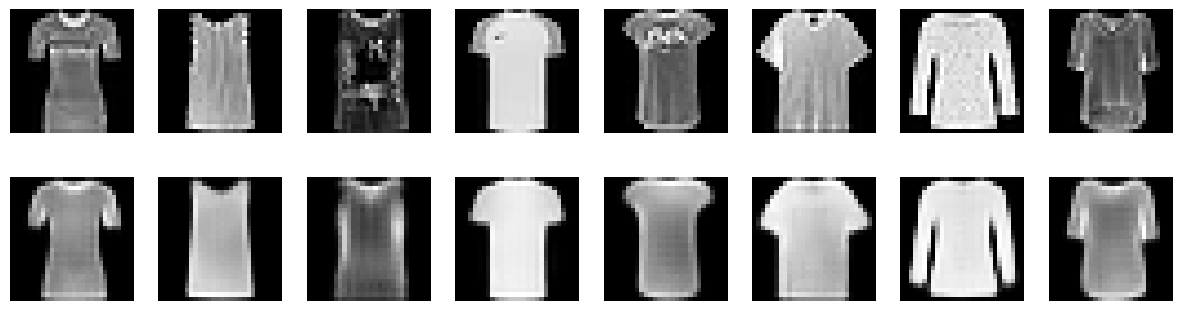

Validation: |          | 0/? [00:00<?, ?it/s]

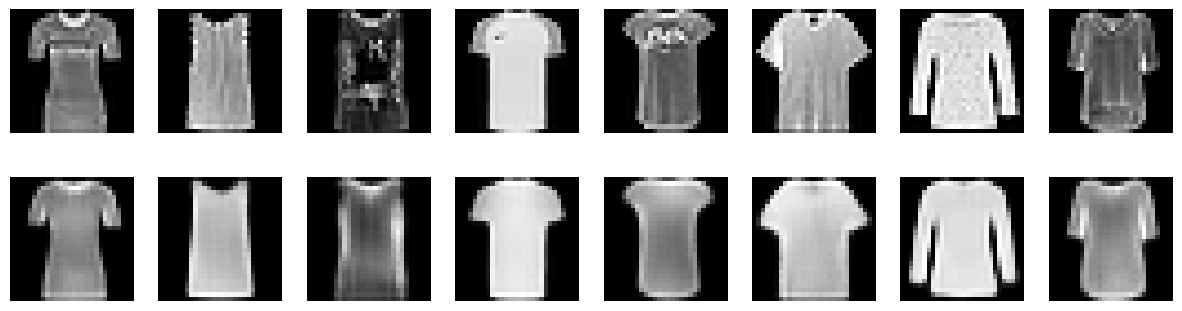

Validation: |          | 0/? [00:00<?, ?it/s]

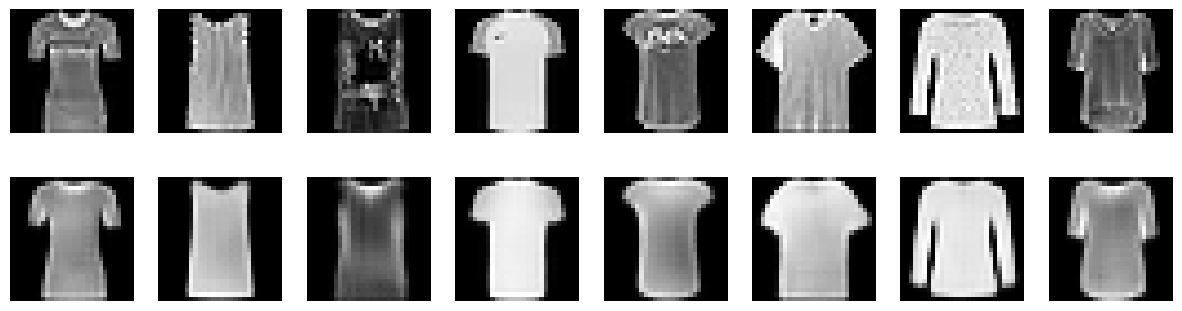

Validation: |          | 0/? [00:00<?, ?it/s]

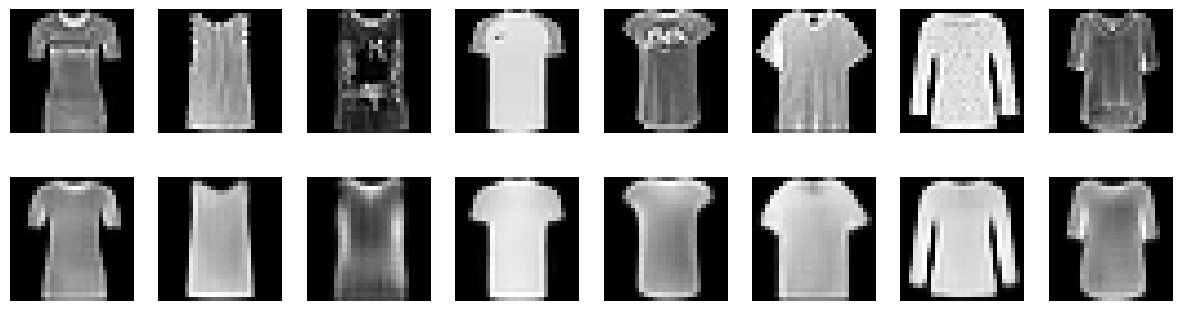

Validation: |          | 0/? [00:00<?, ?it/s]

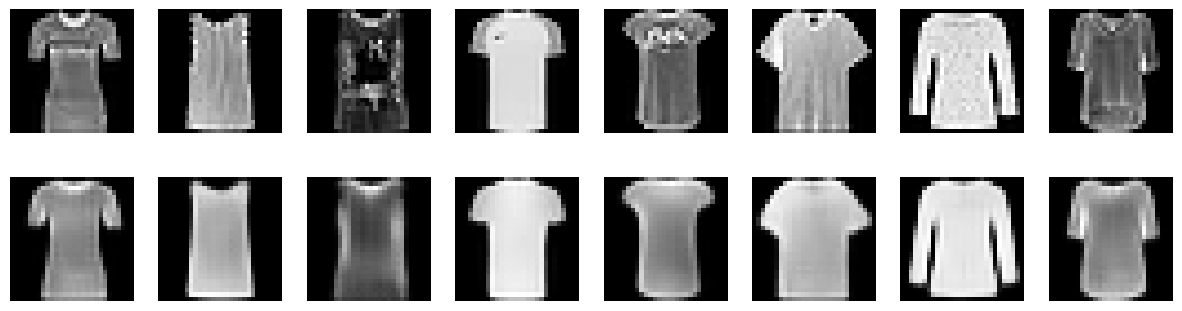

Validation: |          | 0/? [00:00<?, ?it/s]

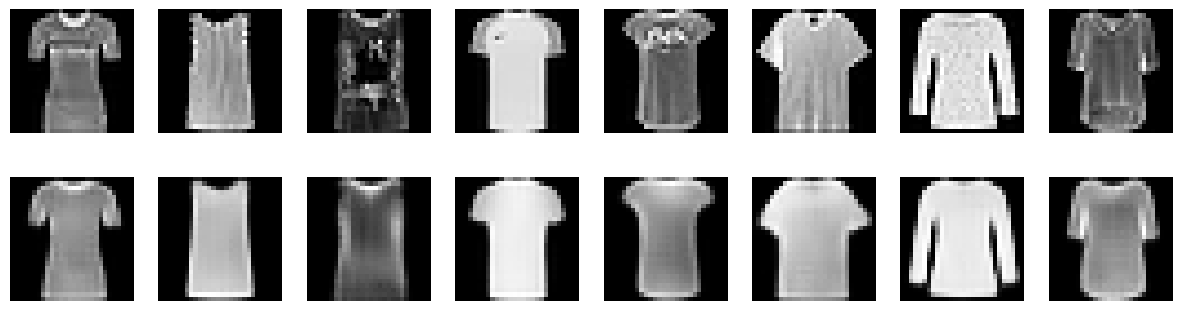

Validation: |          | 0/? [00:00<?, ?it/s]

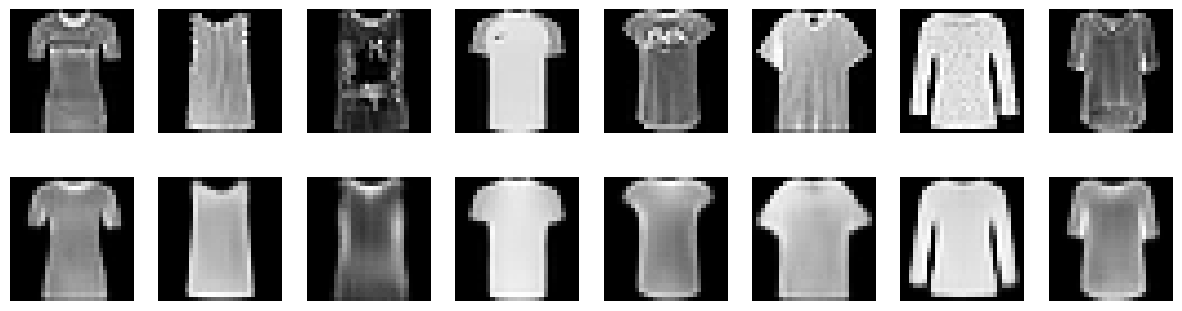

Validation: |          | 0/? [00:00<?, ?it/s]

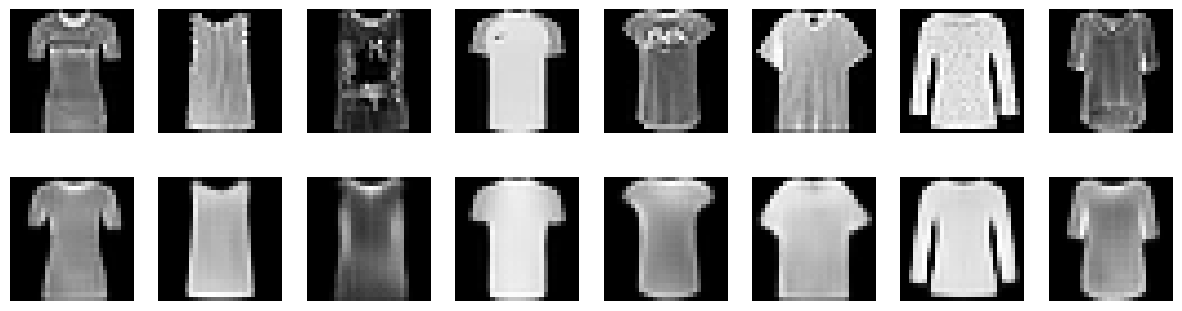

Validation: |          | 0/? [00:00<?, ?it/s]

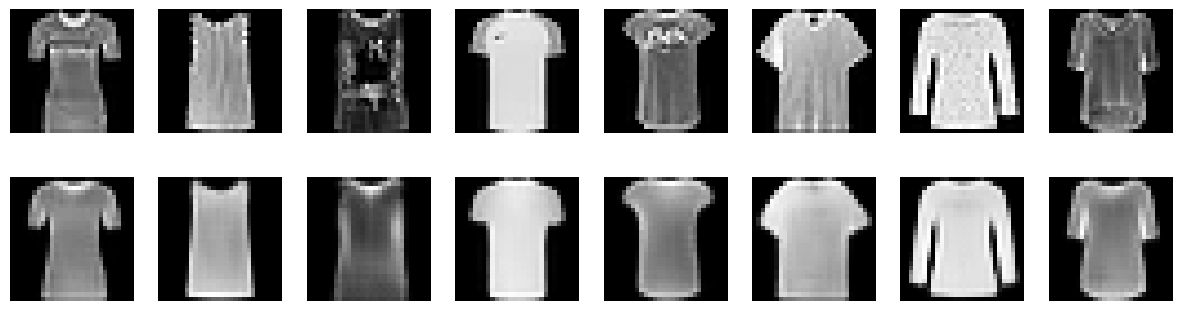

Validation: |          | 0/? [00:00<?, ?it/s]

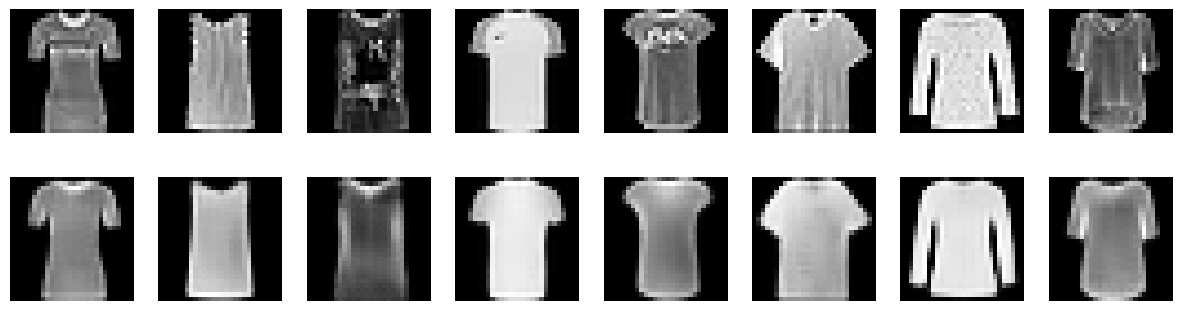

Validation: |          | 0/? [00:00<?, ?it/s]

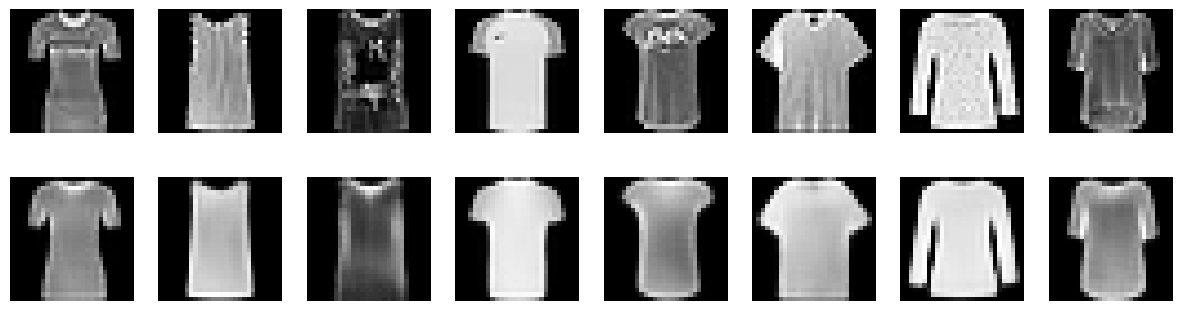

Validation: |          | 0/? [00:00<?, ?it/s]

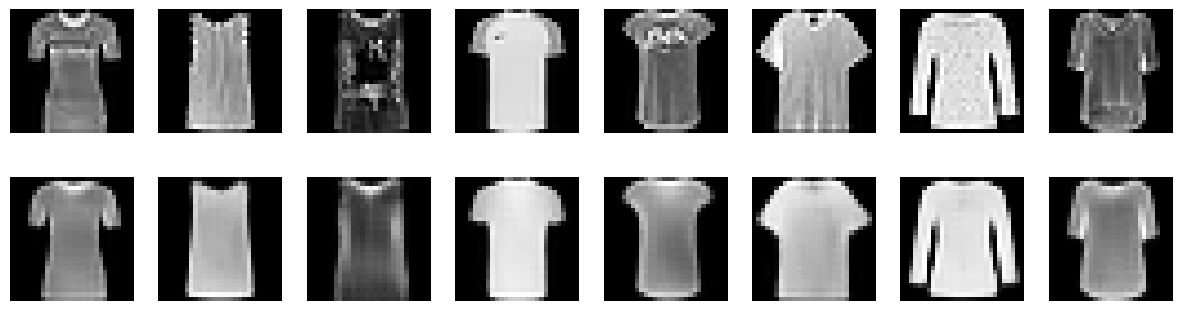

Validation: |          | 0/? [00:00<?, ?it/s]

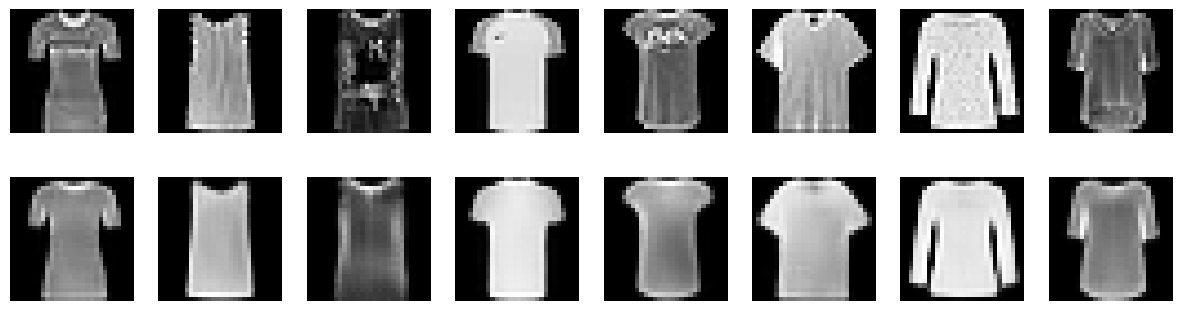

Validation: |          | 0/? [00:00<?, ?it/s]

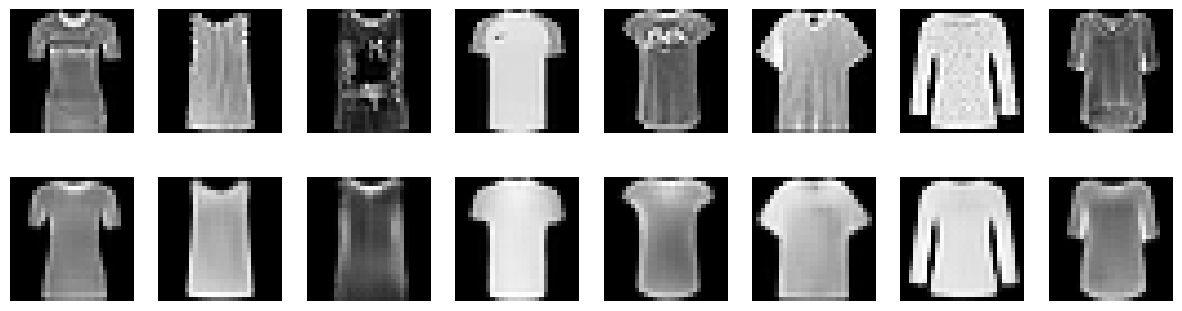

Validation: |          | 0/? [00:00<?, ?it/s]

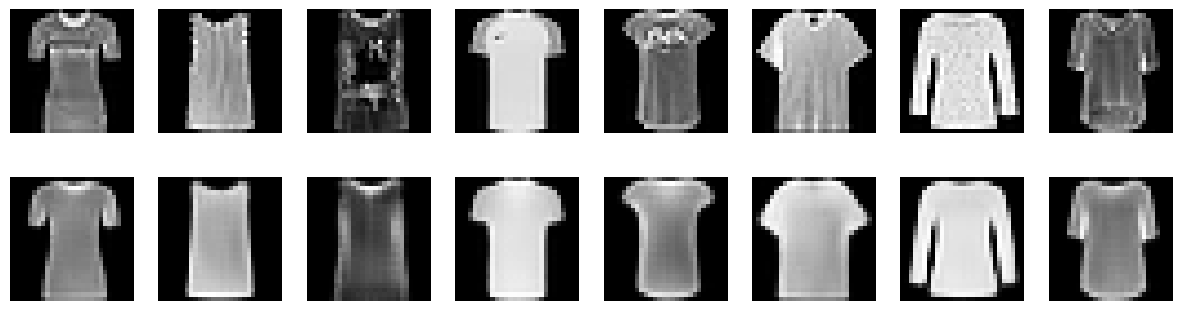

Validation: |          | 0/? [00:00<?, ?it/s]

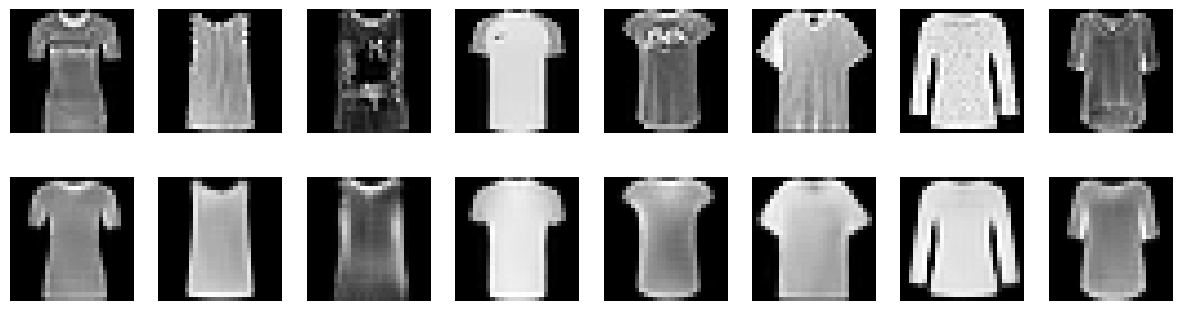

Validation: |          | 0/? [00:00<?, ?it/s]

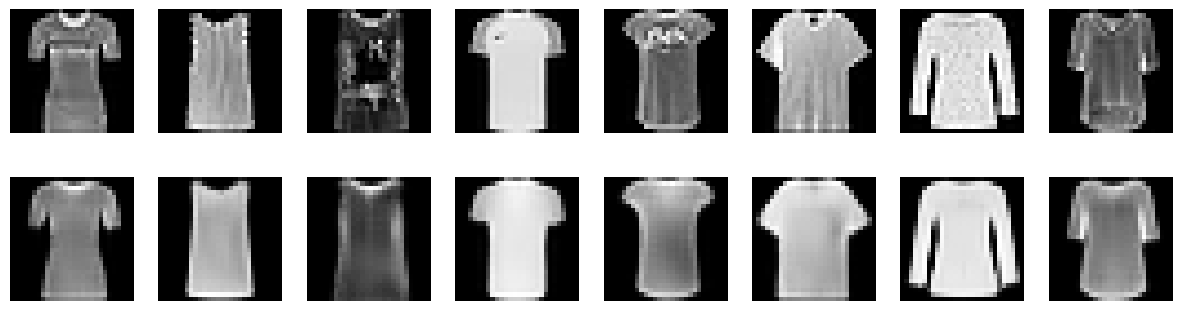

Validation: |          | 0/? [00:00<?, ?it/s]

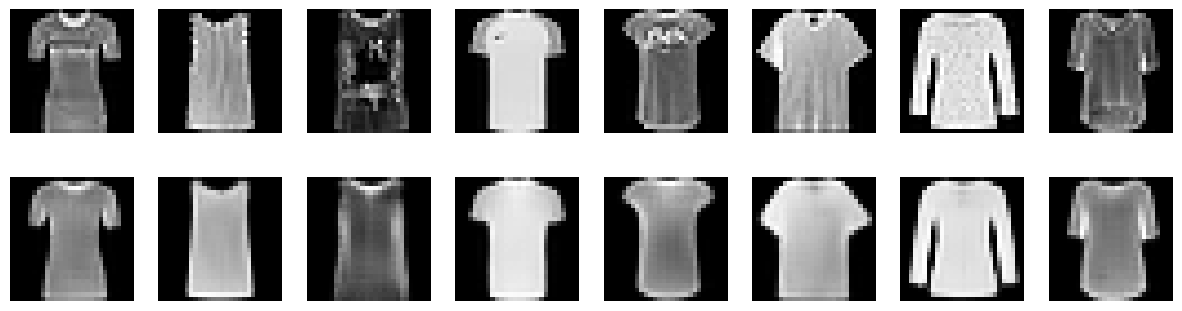

Validation: |          | 0/? [00:00<?, ?it/s]

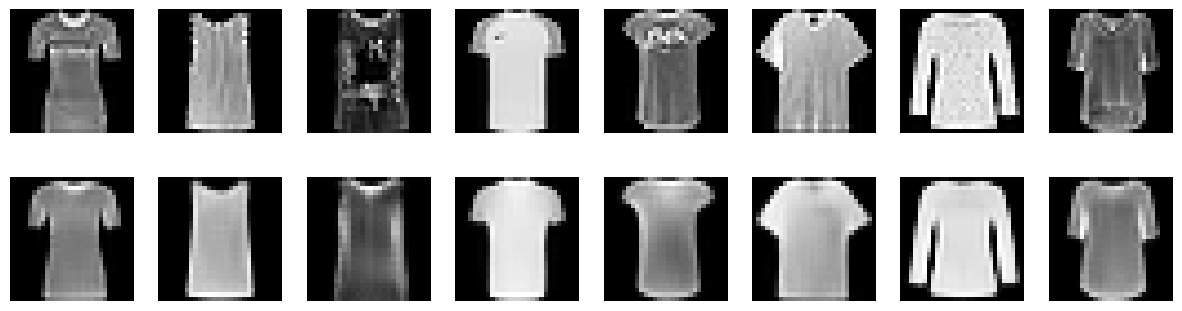

Validation: |          | 0/? [00:00<?, ?it/s]

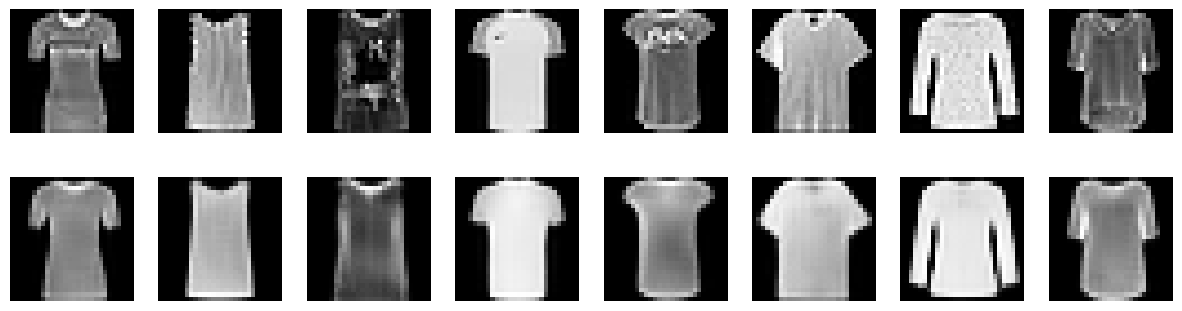

Validation: |          | 0/? [00:00<?, ?it/s]

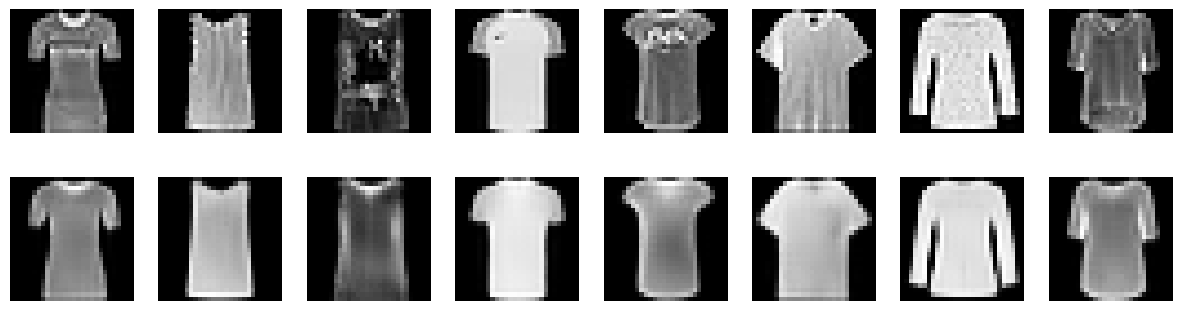

Validation: |          | 0/? [00:00<?, ?it/s]

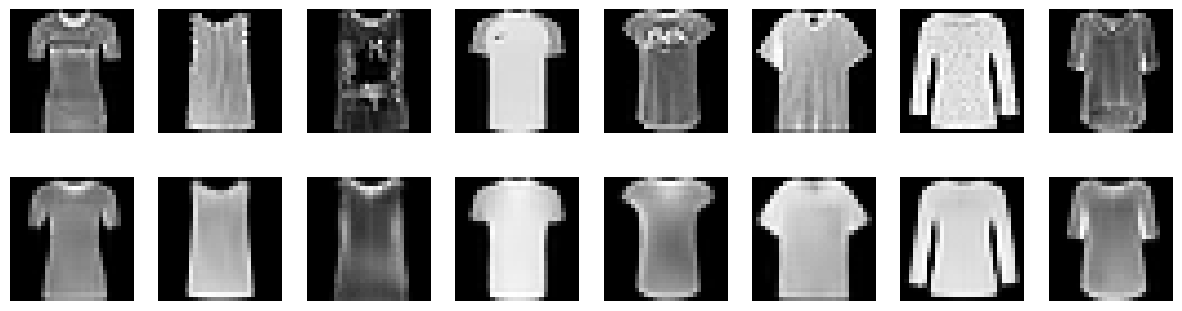

Validation: |          | 0/? [00:00<?, ?it/s]

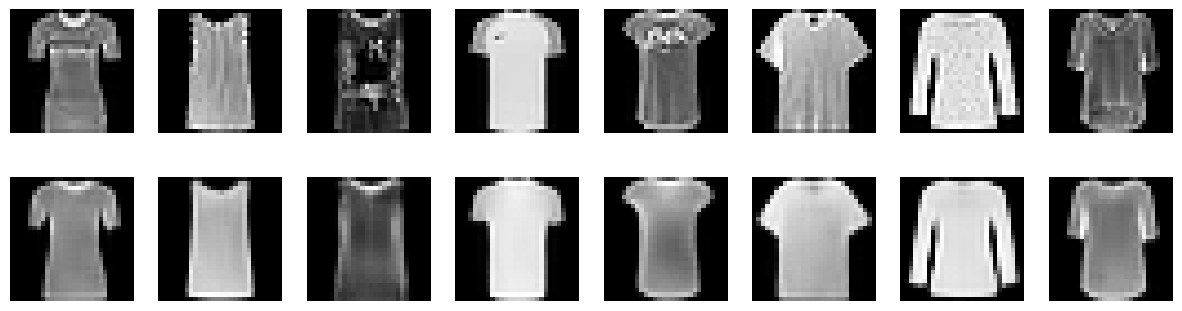

Validation: |          | 0/? [00:00<?, ?it/s]

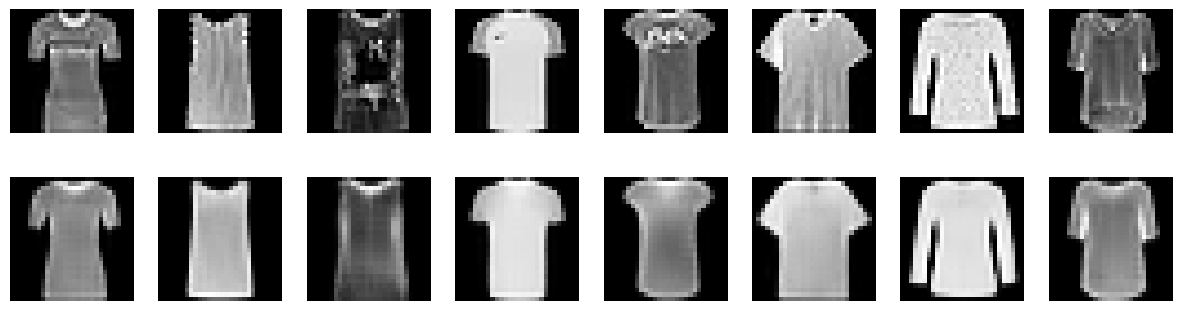

Validation: |          | 0/? [00:00<?, ?it/s]

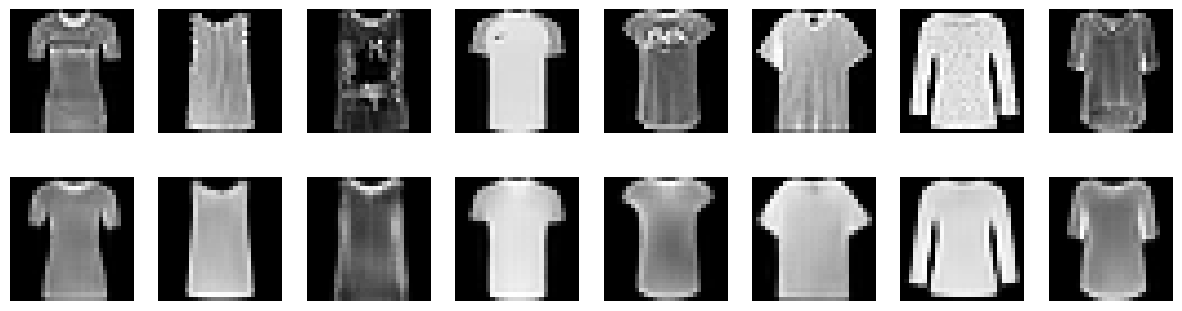

Validation: |          | 0/? [00:00<?, ?it/s]

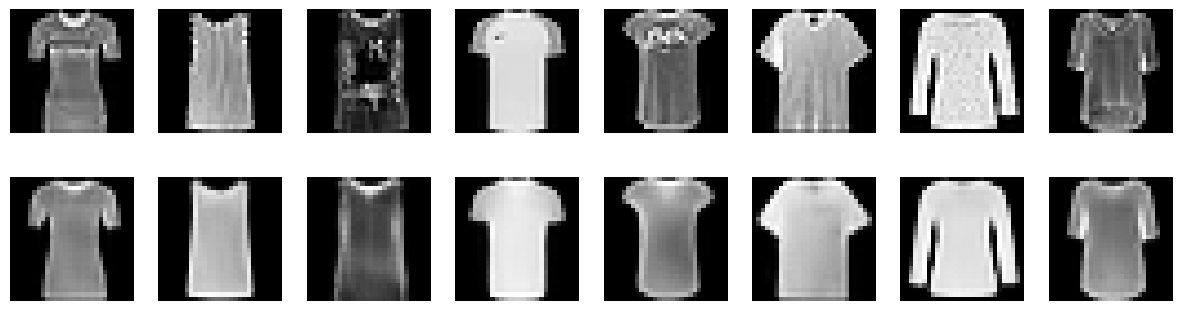

Validation: |          | 0/? [00:00<?, ?it/s]

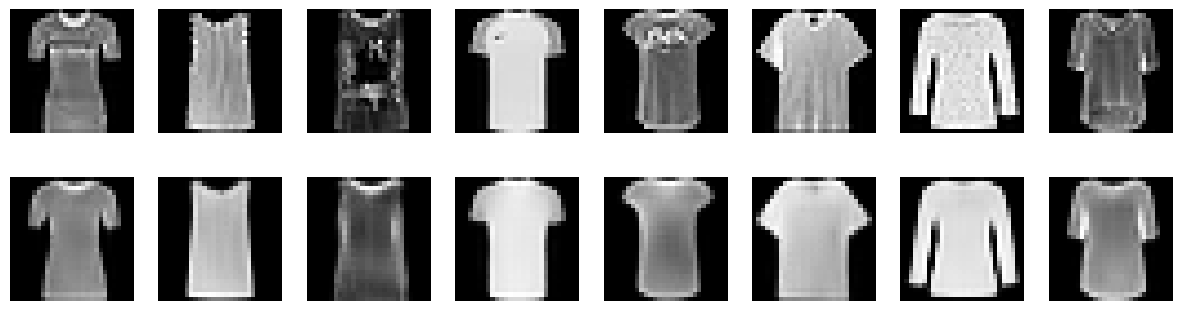

`Trainer.fit` stopped: `max_epochs=35` reached.


In [16]:
trainer.fit(model=lwrapper, 
            train_dataloaders=train_loader, 
            val_dataloaders=val_loader)